In [1]:
# script to calculate ratios for use in TTS method 
# author: sofia chelpon
# date created: 2-12-2020

In [1]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns
import datetime as dt
from scipy.optimize import least_squares

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [2]:
# load in both toga and awas data pickles 
awas_df = pd.read_pickle("./awas_data_df_replace_twp.pkl")
toga_df = pd.read_pickle("./toga_data_df_twp.pkl")

In [3]:
################# -------------------- TOGA  -------------------- #################

In [4]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
toga_means = pd.DataFrame()

# all rf 
toga_means['UT - All RF'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)].mean()
toga_means['BL - All RF'] = toga_df.loc[(toga_df['GGALT'] < 2000)].mean()
# rf03
toga_means['UT - RF03'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF03')].mean()
toga_means['BL - RF03'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF03')].mean()
# rf04 
toga_means['UT - RF04'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF04')].mean()
toga_means['BL - RF04'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF04')].mean()
# rf05
toga_means['UT - RF05'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF05')].mean()
toga_means['BL - RF05'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF05')].mean()
# rf06
toga_means['UT - RF06'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF06')].mean()
toga_means['BL - RF06'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF06')].mean()
# rf07 
toga_means['UT - RF07'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF07')].mean()
toga_means['BL - RF07'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF07')].mean()
# rf08
toga_means['UT - RF08'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF08')].mean()
toga_means['BL - RF08'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF08')].mean()
# rf09
toga_means['UT - RF09'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF09')].mean()
toga_means['BL - RF09'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF09')].mean()
# rf10
toga_means['UT - RF10'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF10')].mean()
toga_means['BL - RF10'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF10')].mean()
# rf11
toga_means['UT - RF11'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF11')].mean()
toga_means['BL - RF11'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF11')].mean()
# rf12
toga_means['UT - RF12'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF12')].mean()
toga_means['BL - RF12'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF12')].mean()
# rf13
toga_means['UT - RF13'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF13')].mean()
toga_means['BL - RF13'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF13')].mean()
# rf14
toga_means['UT - RF14'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF14')].mean()
toga_means['BL - RF14'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF14')].mean()
# rf14
toga_means['UT - RF15'] = toga_df.loc[(toga_df['GGALT'] > 12000) & (toga_df['GGALT'] < 14000)
                                                          & (toga_df['Flight'] == 'RF15')].mean()
toga_means['BL - RF15'] = toga_df.loc[(toga_df['GGALT'] < 2000) & (toga_df['Flight'] == 'RF15')].mean()

toga_means = toga_means.drop('GGALT').drop('GGLAT').drop('GGLON')#.drop('WIC')
#toga_means.index.name = "Trace_Gas"
toga_means = toga_means.reset_index()
toga_means = toga_means.rename(columns={'index': 'Trace_Gas'})


# save output
toga_means.to_pickle("./toga_means_twp.pkl")
toga_means

,Trace_Gas,UT - All RF,BL - All RF,UT - RF03,BL - RF03,UT - RF04,BL - RF04,UT - RF05,BL - RF05,UT - RF06,...,UT - RF11,BL - RF11,UT - RF12,BL - RF12,UT - RF13,BL - RF13,UT - RF14,BL - RF14,UT - RF15,BL - RF15
0,Acetaldehyde,18.795282,193.369537,5.595454,167.108322,2.500000,229.972397,3.075758,138.208344,6.589286,...,63.565517,249.972717,38.033333,447.666656,11.053572,279.600006,17.228125,NaN,11.133334,301.349976
1,n_Butane,3.164569,16.862217,1.483846,4.257334,2.464828,16.403793,3.251895,19.059166,9.955896,...,2.065577,4.648181,0.582093,28.183334,3.701280,12.250000,1.433182,NaN,3.640000,5.620000
2,i_Butane,2.724852,11.421493,1.187180,2.712333,2.315517,11.994138,2.506632,13.337779,7.221539,...,2.226346,3.678182,0.656977,24.086664,3.147360,9.280000,1.543182,NaN,3.318333,4.230000
3,Benzene,8.882162,24.730907,5.911282,12.359667,6.712183,34.138622,6.386842,22.677223,12.191794,...,12.662115,16.302727,5.625116,66.946663,8.973920,25.750000,7.825455,NaN,8.785000,18.654999
4,C3H8,37.984554,91.162895,19.641026,27.666666,31.264368,108.724136,33.115791,103.805557,79.153847,...,33.788460,26.090910,22.732557,177.333328,48.208000,95.000000,24.590910,NaN,41.500000,72.000000
5,Methanol,227.945450,637.142212,107.589745,477.250000,178.162796,810.896545,149.757889,616.972229,80.270271,...,332.134613,619.909119,293.058136,912.666687,268.488007,705.000000,284.681824,NaN,314.000000,932.000000
6,Bromoform,0.599927,0.954724,0.372615,0.841533,0.372494,1.074793,0.437095,1.005944,0.357513,...,0.616135,0.588636,0.740442,1.080000,0.673000,0.682000,0.459341,NaN,0.484000,0.599500
7,Tetrachloroethylene,0.951313,1.558500,0.776923,1.404000,0.729310,1.759310,0.850421,1.360278,0.861282,...,1.100385,1.013636,0.926512,2.090000,1.022320,1.570000,0.901364,NaN,0.931667,1.295000
8,Dibromomethane,1.018562,1.065606,0.997667,1.015167,0.912035,1.058966,0.974095,1.044278,1.037154,...,1.005308,0.980889,1.036477,1.048333,1.026776,0.915000,0.942159,NaN,0.731667,0.880000
9,Dichloromethane,43.730671,57.213898,41.103592,53.164661,43.820915,72.776215,40.344425,50.533337,50.733074,...,49.803082,55.081253,41.042091,82.116669,42.894882,56.169998,40.147274,NaN,44.493336,57.294998


In [5]:
# ratios for 1) flights in total and 2) individual flights 
toga_ratios = pd.DataFrame()

toga_ratios['Trace_Gas'] = toga_means['Trace_Gas']
toga_ratios['All RF'] = toga_means['UT - All RF']/toga_means['BL - All RF']
toga_ratios['RF03'] = toga_means['UT - RF03']/toga_means['BL - RF03']
toga_ratios['RF04'] = toga_means['UT - RF04']/toga_means['BL - RF04']
toga_ratios['RF05'] = toga_means['UT - RF05']/toga_means['BL - RF05']
toga_ratios['RF06'] = toga_means['UT - RF06']/toga_means['BL - RF06']
toga_ratios['RF07'] = toga_means['UT - RF07']/toga_means['BL - RF07']
toga_ratios['RF08'] = toga_means['UT - RF08']/toga_means['BL - RF08']
toga_ratios['RF09'] = toga_means['UT - RF09']/toga_means['BL - RF09']
toga_ratios['RF10'] = toga_means['UT - RF10']/toga_means['BL - RF10']
toga_ratios['RF11'] = toga_means['UT - RF11']/toga_means['BL - RF11']
toga_ratios['RF12'] = toga_means['UT - RF12']/toga_means['BL - RF12']
toga_ratios['RF13'] = toga_means['UT - RF13']/toga_means['BL - RF13']
toga_ratios['RF14'] = toga_means['UT - RF14']/toga_means['BL - RF14']
toga_ratios['RF15'] = toga_means['UT - RF15']/toga_means['BL - RF15']

toga_ratios

# drop species names so doesnt duplicate column when merged 
toga_ratios = toga_ratios.drop('Trace_Gas', axis = 1)
toga_ratios

,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14,RF15
0,0.097199,0.033484,0.010871,0.022254,0.027101,0.151014,0.212152,0.211208,0.021128,0.254290,0.084959,0.039534,NaN,0.036945
1,0.187672,0.348539,0.150260,0.170621,0.104103,0.487147,0.163599,0.455572,1.271104,0.444384,0.020654,0.302145,NaN,0.647687
2,0.238572,0.437697,0.193054,0.187935,0.127381,0.563481,0.229809,0.522306,1.227732,0.605284,0.027276,0.339155,NaN,0.784476
3,0.359152,0.478272,0.196616,0.281641,0.162429,0.629700,0.373829,0.924865,0.898816,0.776687,0.084024,0.348502,NaN,0.470919
4,0.416667,0.709917,0.287557,0.319018,0.235523,0.654727,0.424317,0.895255,1.251672,1.295028,0.128191,0.507453,NaN,0.576389
5,0.357762,0.225437,0.219711,0.242730,0.177393,0.350427,0.422359,0.452388,0.292676,0.535780,0.321101,0.380834,NaN,0.336910
6,0.628377,0.442782,0.346573,0.434512,0.284644,0.687468,0.856548,1.233019,0.893955,1.046715,0.685594,0.986804,NaN,0.807339
7,0.610403,0.553364,0.414543,0.625182,0.323689,0.729214,0.677162,0.885577,0.719536,1.085581,0.443307,0.651159,NaN,0.719434
8,0.955853,0.982761,0.861250,0.932793,0.842872,0.989712,0.974084,1.105400,1.020170,1.024895,0.988690,1.122160,NaN,0.831439
9,0.764337,0.773137,0.602132,0.798372,0.708578,0.873039,0.816255,0.877338,0.888527,0.904175,0.499802,0.763662,NaN,0.776566


In [6]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = 'toga_lifetimes_07022020.xlsx'
toga_lifetimes = pd.read_excel(mypath2)

# merge lifetimes to ratios
toga_ratios_full = toga_lifetimes.merge(toga_ratios, left_index=True, right_index=True)
toga_ratios_full.insert(0, 'Instrument', 'TOGA')
toga_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14,RF15
0,TOGA,Acetaldehyde,0.29,0.33,0.35,0.097199,0.033484,0.010871,0.022254,0.027101,0.151014,0.212152,0.211208,0.021128,0.254290,0.084959,0.039534,NaN,0.036945
1,TOGA,n_Butane,2.00,3.80,8.10,0.187672,0.348539,0.150260,0.170621,0.104103,0.487147,0.163599,0.455572,1.271104,0.444384,0.020654,0.302145,NaN,0.647687
2,TOGA,i_Butane,2.20,4.00,7.90,0.238572,0.437697,0.193054,0.187935,0.127381,0.563481,0.229809,0.522306,1.227732,0.605284,0.027276,0.339155,NaN,0.784476
3,TOGA,Benzene,3.80,6.40,11.90,0.359152,0.478272,0.196616,0.281641,0.162429,0.629700,0.373829,0.924865,0.898816,0.776687,0.084024,0.348502,NaN,0.470919
4,TOGA,C3H8,4.20,9.10,22.00,0.416667,0.709917,0.287557,0.319018,0.235523,0.654727,0.424317,0.895255,1.251672,1.295028,0.128191,0.507453,NaN,0.576389
5,TOGA,Methanol,5.20,9.60,20.00,0.357762,0.225437,0.219711,0.242730,0.177393,0.350427,0.422359,0.452388,0.292676,0.535780,0.321101,0.380834,NaN,0.336910
6,TOGA,Bromoform,13.00,18.00,25.00,0.628377,0.442782,0.346573,0.434512,0.284644,0.687468,0.856548,1.233019,0.893955,1.046715,0.685594,0.986804,NaN,0.807339
7,TOGA,Tetrachloroethylene,27.00,78.00,320.00,0.610403,0.553364,0.414543,0.625182,0.323689,0.729214,0.677162,0.885577,0.719536,1.085581,0.443307,0.651159,NaN,0.719434
8,TOGA,Dibromomethane,39.00,96.00,310.00,0.955853,0.982761,0.861250,0.932793,0.842872,0.989712,0.974084,1.105400,1.020170,1.024895,0.988690,1.122160,NaN,0.831439
9,TOGA,Dichloromethane,46.00,110.00,340.00,0.764337,0.773137,0.602132,0.798372,0.708578,0.873039,0.816255,0.877338,0.888527,0.904175,0.499802,0.763662,NaN,0.776566


In [7]:
################# -------------------- AWAS  -------------------- #################

In [8]:
# get mean in UT and BL for 1) flights in total and 2) individual flights 
awas_means = pd.DataFrame()

# all rf 
awas_means['UT - All RF'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)].mean()
awas_means['BL - All RF'] = awas_df.loc[(awas_df['GGALT'] < 2000)].mean()
# rf03
awas_means['UT - RF03'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF03')].mean()
awas_means['BL - RF03'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF03')].mean()
# rf04 
awas_means['UT - RF04'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF04')].mean()
awas_means['BL - RF04'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF04')].mean()
# rf05
awas_means['UT - RF05'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF05')].mean()
awas_means['BL - RF05'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF05')].mean()
# rf06
awas_means['UT - RF06'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF06')].mean()
awas_means['BL - RF06'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF06')].mean()
# rf07 
awas_means['UT - RF07'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF07')].mean()
awas_means['BL - RF07'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF07')].mean()
# rf08
awas_means['UT - RF08'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF08')].mean()
awas_means['BL - RF08'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF08')].mean()
# rf09
awas_means['UT - RF09'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF09')].mean()
awas_means['BL - RF09'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF09')].mean()
# rf10
awas_means['UT - RF10'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF10')].mean()
awas_means['BL - RF10'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF10')].mean()
# rf11
awas_means['UT - RF11'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF11')].mean()
awas_means['BL - RF11'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF11')].mean()
# rf12
awas_means['UT - RF12'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF12')].mean()
awas_means['BL - RF12'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF12')].mean()
# rf13
awas_means['UT - RF13'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF13')].mean()
awas_means['BL - RF13'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF13')].mean()
# rf14
awas_means['UT - RF14'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF14')].mean()
awas_means['BL - RF14'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF14')].mean()
# rf15
awas_means['UT - RF15'] = awas_df.loc[(awas_df['GGALT'] > 12000) & (awas_df['GGALT'] < 14000)
                                                          & (awas_df['Flight'] == 'RF15')].mean()
awas_means['BL - RF15'] = awas_df.loc[(awas_df['GGALT'] < 2000) & (awas_df['Flight'] == 'RF15')].mean()

#toga_means = toga_means.transpose()
awas_means.index.name = "Trace_Gas"
awas_means = awas_means.drop('GGALT').drop('GGLAT').drop('GGLON')

# save output 
awas_means.to_pickle("./awas_means_twp.pkl")
awas_means

,UT - All RF,BL - All RF,UT - RF03,BL - RF03,UT - RF04,BL - RF04,UT - RF05,BL - RF05,UT - RF06,BL - RF06,...,UT - RF11,BL - RF11,UT - RF12,BL - RF12,UT - RF13,BL - RF13,UT - RF14,BL - RF14,UT - RF15,BL - RF15
Trace_Gas,,,,,,,,,,,,,,,,,,,,,
C2H6_Ethane,492.095795,821.637939,NaN,NaN,NaN,NaN,446.500000,841.636353,621.636353,1659.250000,...,504.916656,582.142883,435.037048,NaN,521.349976,NaN,473.777771,NaN,516.799988,744.500000
C2H2_Ethyne,56.610779,121.142860,NaN,NaN,NaN,NaN,45.312500,139.363632,92.545456,325.500000,...,71.416664,82.571426,37.444443,NaN,52.700001,NaN,47.222221,NaN,57.799999,108.500000
C3H8_Propane,40.538921,143.758621,NaN,NaN,NaN,NaN,34.750000,191.090912,84.727272,562.500000,...,34.583332,39.000000,20.444445,NaN,45.599998,NaN,26.888889,NaN,36.000000,58.000000
C4H10_Isobutane,2.969461,15.060345,NaN,NaN,NaN,NaN,2.812500,22.490911,9.536364,78.224998,...,2.066667,2.214286,1.029630,NaN,2.697500,NaN,1.300000,NaN,1.740000,3.100000
C4H10_nButane,5.002994,24.112068,NaN,NaN,NaN,NaN,5.243750,35.263638,18.809092,135.675003,...,3.466666,3.071429,1.929630,NaN,4.330000,NaN,1.988889,NaN,3.220000,4.650000
C5H12_nPentane,0.804808,4.175510,NaN,NaN,NaN,NaN,1.100000,6.211111,2.309091,25.275000,...,0.310000,0.240000,0.400000,NaN,0.273684,NaN,0.150000,NaN,0.366667,0.200000
C6H6_Benzene,9.776047,26.858931,NaN,NaN,NaN,NaN,6.599999,32.027271,16.545454,78.900002,...,14.908334,18.142857,6.162963,NaN,8.730000,NaN,7.100000,NaN,8.580000,20.900000
OCS_Carbonyl_sulfide,549.138550,546.824585,NaN,NaN,NaN,NaN,557.687500,562.727295,560.727295,559.750000,...,548.083313,548.333313,551.846130,NaN,537.150024,NaN,542.111084,NaN,535.799988,568.500000
C2H6S_Dimethyl_sulfide,0.354545,16.533684,NaN,NaN,NaN,NaN,0.585000,19.000002,0.186667,9.825001,...,0.124000,8.062857,0.182857,NaN,0.178261,NaN,0.140000,NaN,0.080000,7.350000


In [9]:
# ratios for 1) flights in total and 2) individual flights 
awas_ratios = pd.DataFrame()

awas_ratios['All RF'] = awas_means['UT - All RF']/awas_means['BL - All RF']
awas_ratios['RF03'] = awas_means['UT - RF03']/awas_means['BL - RF03']
awas_ratios['RF04'] = awas_means['UT - RF04']/awas_means['BL - RF04']
awas_ratios['RF05'] = awas_means['UT - RF05']/awas_means['BL - RF05']
awas_ratios['RF06'] = awas_means['UT - RF06']/awas_means['BL - RF06']
awas_ratios['RF07'] = awas_means['UT - RF07']/awas_means['BL - RF07']
awas_ratios['RF08'] = awas_means['UT - RF08']/awas_means['BL - RF08']
awas_ratios['RF09'] = awas_means['UT - RF09']/awas_means['BL - RF09']
awas_ratios['RF10'] = awas_means['UT - RF10']/awas_means['BL - RF10']
awas_ratios['RF11'] = awas_means['UT - RF11']/awas_means['BL - RF11']
awas_ratios['RF12'] = awas_means['UT - RF12']/awas_means['BL - RF12']
awas_ratios['RF13'] = awas_means['UT - RF13']/awas_means['BL - RF13']
awas_ratios['RF14'] = awas_means['UT - RF14']/awas_means['BL - RF14']
awas_ratios['RF15'] = awas_means['UT - RF15']/awas_means['BL - RF15']

awas_ratios = awas_ratios.reset_index()

# trop trace gas names column so doesnt get duplicated 
awas_ratios = awas_ratios.drop('Trace_Gas', axis = 1)

In [10]:
### add attribute to each species (BL, tropo, and UT lifetimes)
# read in from xls file to make dataframe
mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_lifetimes_12162019.xlsx'
awas_lifetimes = pd.read_excel(mypath2)
len(awas_lifetimes)

# merge lifetimes to ratios 
awas_ratios_full = awas_lifetimes.merge(awas_ratios, left_index=True, right_index=True)
awas_ratios_full.insert(0, 'Instrument', 'AWAS')
awas_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14,RF15
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.598920,NaN,NaN,0.530514,0.374649,0.574789,0.521834,NaN,0.862412,0.867341,NaN,NaN,NaN,0.694157
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.467306,NaN,NaN,0.325139,0.284318,0.578051,0.434454,NaN,1.215641,0.864908,NaN,NaN,NaN,0.532719
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.281993,NaN,NaN,0.181851,0.150626,0.413577,0.242300,NaN,1.164780,0.886752,NaN,NaN,NaN,0.620690
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.197171,NaN,NaN,0.125051,0.121909,0.540793,0.180229,NaN,1.450550,0.933333,NaN,NaN,NaN,0.561290
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.207489,NaN,NaN,0.148701,0.138633,0.572463,0.175000,NaN,1.314560,1.128682,NaN,NaN,NaN,0.692473
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.192745,NaN,NaN,0.177102,0.091359,1.098143,0.169452,NaN,1.147222,1.291667,NaN,NaN,NaN,1.833333
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.363978,NaN,NaN,0.206074,0.209702,0.580932,0.303141,NaN,0.900744,0.821719,NaN,NaN,NaN,0.410526
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,1.004232,NaN,NaN,0.991044,1.001746,1.027613,1.044827,NaN,1.025027,0.999544,NaN,NaN,NaN,0.942480
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.021444,NaN,NaN,0.030789,0.018999,0.019636,0.005484,NaN,0.125389,0.015379,NaN,NaN,NaN,0.010884
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.002709,NaN,NaN,1.002594,1.002320,1.002741,1.009211,NaN,1.003206,0.998242,NaN,NaN,NaN,0.993881


In [11]:
################# -------------------- MERGE THE TWO  -------------------- #################

In [12]:
master_list = awas_ratios_full
master_list = master_list.append(toga_ratios_full, ignore_index = True, sort = None)

# pickle this!! 
master_list.to_pickle("./contrast_ratios_twp_awas_replace.pkl")

# look at output 
master_list

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14,RF15
0,AWAS,C2H6_Ethane,18.555721,48.949092,167.260709,0.598920,NaN,NaN,0.530514,0.374649,0.574789,0.521834,NaN,0.862412,0.867341,NaN,NaN,NaN,0.694157
1,AWAS,C2H2_Ethyne,5.422335,9.603369,18.712675,0.467306,NaN,NaN,0.325139,0.284318,0.578051,0.434454,NaN,1.215641,0.864908,NaN,NaN,NaN,0.532719
2,AWAS,C3H8_Propane,4.214557,9.062693,22.450000,0.281993,NaN,NaN,0.181851,0.150626,0.413577,0.242300,NaN,1.164780,0.886752,NaN,NaN,NaN,0.620690
3,AWAS,C4H10_Isobutane,2.175570,4.031311,7.903592,0.197171,NaN,NaN,0.125051,0.121909,0.540793,0.180229,NaN,1.450550,0.933333,NaN,NaN,NaN,0.561290
4,AWAS,C4H10_nButane,1.959376,3.813463,8.057685,0.207489,NaN,NaN,0.148701,0.138633,0.572463,0.175000,NaN,1.314560,1.128682,NaN,NaN,NaN,0.692473
5,AWAS,C5H12_nPentane,1.214449,2.312606,4.723079,0.192745,NaN,NaN,0.177102,0.091359,1.098143,0.169452,NaN,1.147222,1.291667,NaN,NaN,NaN,1.833333
6,AWAS,C6H6_Benzene,3.755136,6.447323,11.947207,0.363978,NaN,NaN,0.206074,0.209702,0.580932,0.303141,NaN,0.900744,0.821719,NaN,NaN,NaN,0.410526
7,AWAS,OCS_Carbonyl_sulfide,2000.000000,2000.000000,2000.000000,1.004232,NaN,NaN,0.991044,1.001746,1.027613,1.044827,NaN,1.025027,0.999544,NaN,NaN,NaN,0.942480
8,AWAS,C2H6S_Dimethyl_sulfide,0.955122,1.689426,3.279163,0.021444,NaN,NaN,0.030789,0.018999,0.019636,0.005484,NaN,0.125389,0.015379,NaN,NaN,NaN,0.010884
9,AWAS,CCl2F2_CFC_12,37000.000000,37000.000000,37000.000000,1.002709,NaN,NaN,1.002594,1.002320,1.002741,1.009211,NaN,1.003206,0.998242,NaN,NaN,NaN,0.993881


In [13]:
toga_ratios_full

,Instrument,Trace_Gas,BL_tau,TROPO_tau,UT_tau,All RF,RF03,RF04,RF05,RF06,RF07,RF08,RF09,RF10,RF11,RF12,RF13,RF14,RF15
0,TOGA,Acetaldehyde,0.29,0.33,0.35,0.097199,0.033484,0.010871,0.022254,0.027101,0.151014,0.212152,0.211208,0.021128,0.254290,0.084959,0.039534,NaN,0.036945
1,TOGA,n_Butane,2.00,3.80,8.10,0.187672,0.348539,0.150260,0.170621,0.104103,0.487147,0.163599,0.455572,1.271104,0.444384,0.020654,0.302145,NaN,0.647687
2,TOGA,i_Butane,2.20,4.00,7.90,0.238572,0.437697,0.193054,0.187935,0.127381,0.563481,0.229809,0.522306,1.227732,0.605284,0.027276,0.339155,NaN,0.784476
3,TOGA,Benzene,3.80,6.40,11.90,0.359152,0.478272,0.196616,0.281641,0.162429,0.629700,0.373829,0.924865,0.898816,0.776687,0.084024,0.348502,NaN,0.470919
4,TOGA,C3H8,4.20,9.10,22.00,0.416667,0.709917,0.287557,0.319018,0.235523,0.654727,0.424317,0.895255,1.251672,1.295028,0.128191,0.507453,NaN,0.576389
5,TOGA,Methanol,5.20,9.60,20.00,0.357762,0.225437,0.219711,0.242730,0.177393,0.350427,0.422359,0.452388,0.292676,0.535780,0.321101,0.380834,NaN,0.336910
6,TOGA,Bromoform,13.00,18.00,25.00,0.628377,0.442782,0.346573,0.434512,0.284644,0.687468,0.856548,1.233019,0.893955,1.046715,0.685594,0.986804,NaN,0.807339
7,TOGA,Tetrachloroethylene,27.00,78.00,320.00,0.610403,0.553364,0.414543,0.625182,0.323689,0.729214,0.677162,0.885577,0.719536,1.085581,0.443307,0.651159,NaN,0.719434
8,TOGA,Dibromomethane,39.00,96.00,310.00,0.955853,0.982761,0.861250,0.932793,0.842872,0.989712,0.974084,1.105400,1.020170,1.024895,0.988690,1.122160,NaN,0.831439
9,TOGA,Dichloromethane,46.00,110.00,340.00,0.764337,0.773137,0.602132,0.798372,0.708578,0.873039,0.816255,0.877338,0.888527,0.904175,0.499802,0.763662,NaN,0.776566


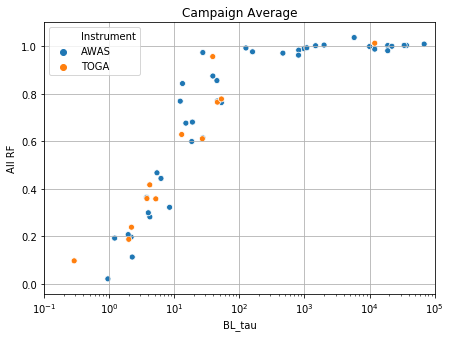

In [14]:
# test plot 
fig, ax = plt.subplots(figsize=(7, 5))
ax.set(xscale="log")
sns.scatterplot(data=master_list, x='BL_tau', y='All RF', hue='Instrument', ax = ax)
ax.set_xlim([10**-1, 10**5])
ax.set_title('Campaign Average')
ax.grid(which = 'major')